# Positivi e Test

Come i test incidono sulla positività.

> Max Pierini

***

Con questo semplice esempio, si dimostra come l'utilizzo di differenti test diagnostici in differenti campioni di popolazione possa, se ignorato, portare a conclusioni errate e a dichiarare come statisticamente significative differenze nei positivi osservati, errore che viene corretto se si considera la differente distribuzione dei test effettuati.

***

In [77]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

from IPython.display import Markdown, Latex, HTML

Nelle prossime tabelle:

- `POS` sono i test positivi
- `NEG` sono i test negativi
- `MAL` sono i malati reali
- `SAN` sono i sani reali
- `A` e `B` sono due differenti test diagnostici
- `TP` è il tasso di posivitità (test positivi su test totali)
- `pct` è la percentuale del tipo test sui test complessivi
- `TOT` sono le somme relative nella tabella

In [2]:
SE_A = .94
SP_A = .99

SE_B = .85
SP_B = .95

I_1 = .051
I_2 = .053

pop_1_A = 200
pop_1_B = 3000

pop_2_A = 2000
pop_2_B = 300

Siano dati due test diagnostici `A` e `B` per malattia $M$ con le seguenti sensibilità **SE** e specificità **SP**

In [3]:
_AB_ = pd.DataFrame({
    'test A': [SE_A, SP_A],
    'test B': [SE_B, SP_B],
}, index=['SE', 'SP'])
_AB_.style.format('{:.0%}')
#Latex(_AB_.to_latex(
#    formatters={'A': "{:.0%}".format, 'B': "{:.0%}".format}
#))

,test A,test B
SE,94%,85%
SP,99%,95%


Siano date due province `prov1` e `prov2` in cui la malattia $M$ ha la seguente incidenza reale giornaliera nel giorno $t$ e in cui campioni di popolazione vengono testati con i due test `A` e `B` in differenti proporzioni

In [4]:
_12_ = pd.DataFrame({
    'test A': [pop_1_A, pop_2_A],
    'test B': [pop_1_B, pop_2_B],
    'incidenza': [I_1, I_2]
}, index=['prov1', 'prov2'])
_12_.style.format(formatter={'incidenza': '{:.1%}'})
#Latex(_12_.to_latex(
#    formatters={'incidenza': "{:.2%}".format}
#))

,test A,test B,incidenza
prov1,200,3000,5.1%
prov2,2000,300,5.3%


In [5]:
def get_confusion_matrix(pop, I, SE, SP):
    df = pd.DataFrame({
        'POS': [np.nan, np.nan, np.nan],
        'NEG': [np.nan, np.nan, np.nan],
        'TOT': [np.nan, np.nan, np.nan],
    }, index=['MAL', 'SAN', 'TOT'])
    # popolazione testata
    df.loc['TOT', 'TOT'] = pop
    # malati reali
    df.loc['MAL', 'TOT'] = pop * I
    # sani reali
    df.loc['SAN', 'TOT'] = pop * (1 - I)
    # veri positivi
    df.loc['MAL', 'POS'] = pop * I * SE
    # falsi negativi
    df.loc['MAL', 'NEG'] = pop * I * (1 - SE)
    # veri negativi
    df.loc['SAN', 'NEG'] = pop * (1 - I) * SP
    # falsi positivi
    df.loc['SAN', 'POS'] = pop * (1 - I) * (1 - SP)
    # positivi totali
    df.loc['TOT', 'POS'] = df.loc['MAL', 'POS'] + df.loc['SAN', 'POS']
    # negativi totali
    df.loc['TOT', 'NEG'] = df.loc['MAL', 'NEG'] + df.loc['SAN', 'NEG']
    # arrontondamento
    df = np.round(df).astype(int)
    return df

In [6]:
_1_A = get_confusion_matrix(pop_1_A, I_1, SE_A, SP_A)
_1_B = get_confusion_matrix(pop_1_B, I_1, SE_B, SP_B)
_2_A = get_confusion_matrix(pop_2_A, I_2, SE_A, SP_A)
_2_B = get_confusion_matrix(pop_2_B, I_2, SE_B, SP_B)

Indicando con 

- `VP` i veri positivi (malati che risultano positivi al test)
- `FN` i falsi negativi (malati che risultano negativi al test)
- `VN` i veri negativi (sani che risultano negativi al test)
- `FP` i falsi positivi (sani che risultano positivi al test)

sappiamo dalla matrice di confusione che

In [81]:
pd.DataFrame({
    'POS': ['VP = MAL * SE', 'FP = SAN*(1-SP)'],
    'NEG': ['FN = MAL*(1-SE)', 'FN = SAN * SP'],
}, index=['MAL', 'SAN'])

,POS,NEG
MAL,VP = MAL * SE,FN = MAL*(1-SE)
SAN,FP = SAN*(1-SP),FN = SAN * SP


Date **SE** ed **SP** dei due test `A` e `B`, l'incidenza reale nelle due province `prov1` e `prov2` e i campioni di popolazione testata con i due test, otteniamo i seguenti risultati dai test effettuati

In [7]:
#Latex(_1_A.to_latex(
#    caption="test A nella provincia 1"
#))
_1_A.style.set_caption("test A nella provincia 1")

,POS,NEG,TOT
MAL,10,1,10
SAN,2,188,190
TOT,11,189,200


In [8]:
#Latex(_1_B.to_latex(
#    caption="test B nella provincia 1"
#))
_1_B.style.set_caption("test B nella provincia 1")

,POS,NEG,TOT
MAL,130,23,153
SAN,142,2705,2847
TOT,272,2728,3000


In [9]:
#Latex(_2_A.to_latex(
#    caption="test A nella provincia 2"
#))
_2_A.style.set_caption("test A nella provincia 2")

,POS,NEG,TOT
MAL,100,6,106
SAN,19,1875,1894
TOT,119,1881,2000


In [10]:
#Latex(_2_B.to_latex(
#    caption="test B nella provincia 2"
#))
_2_B.style.set_caption("test B nella provincia 2")

,POS,NEG,TOT
MAL,14,2,16
SAN,14,270,284
TOT,28,272,300


In [11]:
prov1_obs = pd.DataFrame({
    'POS': [_1_A.POS.TOT, _1_B.POS.TOT],
    'NEG': [_1_A.NEG.TOT, _1_B.NEG.TOT],
}, index=['A', 'B'])

prov1_obs['TOT'] = prov1_obs.sum(axis=1)

prov1_sum = prov1_obs.sum(axis=0)
prov1_sum.name = 'TOT'
prov1_obs = prov1_obs.append(prov1_sum)

prov1_obs['TP'] = prov1_obs.POS / prov1_obs.TOT

prov1_obs.loc['A', 'pct'] = prov1_obs.TOT.A / prov1_obs.TOT.TOT
prov1_obs.loc['B', 'pct'] = prov1_obs.TOT.B / prov1_obs.TOT.TOT
prov1_obs.loc['TOT', 'pct'] = 1

In [12]:
prov2_obs = pd.DataFrame({
    'POS': [_2_A.POS.TOT, _2_B.POS.TOT],
    'NEG': [_2_A.NEG.TOT, _2_B.NEG.TOT],
}, index=['A', 'B'])

prov2_obs['TOT'] = prov2_obs.sum(axis=1)

prov1_sum = prov2_obs.sum(axis=0)
prov1_sum.name = 'TOT'
prov2_obs = prov2_obs.append(prov1_sum)

prov2_obs['TP'] = prov2_obs.POS / prov2_obs.TOT

prov2_obs.loc['A', 'pct'] = prov2_obs.TOT.A / prov2_obs.TOT.TOT
prov2_obs.loc['B', 'pct'] = prov2_obs.TOT.B / prov2_obs.TOT.TOT
prov2_obs.loc['TOT', 'pct'] = 1

In [13]:
def highlight_cols(x):
    #copy df to new - original data are not changed
    df = x.copy()
    #select all values to default value
    df.loc[:,:] = 'background-color: inherit; color: inherit'
    #overwrite values
    df[['POS']] = 'background-color: red; color: white'
    df[['NEG']] = 'background-color: green; color: white'

    #return color df
    return df    

In [14]:
Markdown(f"""
Complessivamente dunque sappiamo che

- nella provincia `prov1` sono stati
osservati {prov1_obs.POS.TOT} positivi su
{prov1_obs.TOT.TOT} casi testati (tasso positività {prov1_obs.TP.TOT:.2%})
- nella provincia `prov2` sono stati
osservati {prov2_obs.POS.TOT} positivi su
{prov2_obs.TOT.TOT} casi testati (tasso positività {prov2_obs.TP.TOT:.2%})
""")


Complessivamente dunque sappiamo che

- nella provincia `prov1` sono stati
osservati 283 positivi su
3200 casi testati (tasso positività 8.84%)
- nella provincia `prov2` sono stati
osservati 147 positivi su
2300 casi testati (tasso positività 6.39%)


A prima vista, i risultati sembrerebbero significativamente differenti ma, sapendo che sono stati usati i due test in diversa percentuale, ci chiediamo, noti i dati di 

- test positivi
- test totali

nelle due province e con i due test, se la differenza di positivi osservata sia davvero statisticamente significativa oppure dovuta "al caso". 

Sappiamo che in realtà le due province hanno incidenza simile, ma poniamo di non conoscere la reale incidenza, come accade nella pratica: conosciamo solamente i risultati dei test.

***

Prima di tutto, osserviamo i dati completi raccolti.

Per la provincia `prov1` sappiamo che:

In [15]:
prov1_obs.style.apply(highlight_cols, axis=None).format({'TP': "{:.2%}", 'pct': "{:.2%}"}).set_caption(
    "dati noti nella provincia 1"
)

,POS,NEG,TOT,TP,pct
A,11,189,200,5.50%,6.25%
B,272,2728,3000,9.07%,93.75%
TOT,283,2917,3200,8.84%,100.00%


In [16]:
#Latex(prov1_obs.to_latex(
#    formatters={'TP': "{:.2%}".format, 'pct': "{:.2%}".format},
#    caption="dati osservati nella provincia 1"
#))

In [17]:
Markdown(f"""
Notiamo quindi che, su un totale di {prov1_obs.TOT.TOT}
test, sono stati effettuati:

- {prov1_obs.TOT.A} test di tipo `A` ({prov1_obs.pct.A:.2%})
- {prov1_obs.TOT.B} test di tipo `B` ({prov1_obs.pct.B:.2%})

i quali hanno riportato

- {prov1_obs.POS.A} positivi con test tipo `A` (tasso positività {prov1_obs.TP.A:.2%})
- {prov1_obs.POS.B} positivi con test tipo `B` (tasso positività {prov1_obs.TP.B:.2%})

Complessivamente osserviamo
{prov1_obs.POS.TOT} positivi
su {prov1_obs.TOT.TOT} casi testati
(tasso positività {prov1_obs.TP.TOT:.2%}).
""")


Notiamo quindi che, su un totale di 3200
test, sono stati effettuati:

- 200 test di tipo `A` (6.25%)
- 3000 test di tipo `B` (93.75%)

i quali hanno riportato

- 11 positivi con test tipo `A` (tasso positività 5.50%)
- 272 positivi con test tipo `B` (tasso positività 9.07%)

Complessivamente osserviamo
283 positivi
su 3200 casi testati
(tasso positività 8.84%).


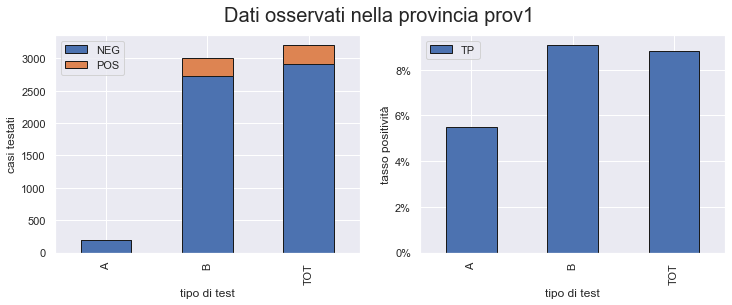

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov1_obs[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
    xlabel='tipo di test'
)

prov1_obs[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
    xlabel='tipo di test'
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Dati osservati nella provincia prov1', fontsize=20)
plt.show()

Per la provincia `prov2` abbiamo invece:

In [19]:
prov2_obs.style.apply(highlight_cols, axis=None).format({'TP': "{:.2%}", 'pct': "{:.2%}"}).set_caption(
    "dati noti nella provincia 2"
)

,POS,NEG,TOT,TP,pct
A,119,1881,2000,5.95%,86.96%
B,28,272,300,9.33%,13.04%
TOT,147,2153,2300,6.39%,100.00%


In [20]:
#Latex(prov2_obs.to_latex(
#    formatters={'TP': "{:.2%}".format, 'pct': "{:.2%}".format},
#    caption="dati osservati nella provincia 2"
#))

In [21]:
Markdown(f"""
Dunque, su un totale di {prov2_obs.TOT.TOT}
test, sono stati effettuati:

- {prov2_obs.TOT.A} test di tipo `A` ({prov2_obs.pct.A:.2%})
- {prov2_obs.TOT.B} test di tipo `B` ({prov2_obs.pct.B:.2%})

i quali hanno riportato

- {prov2_obs.POS.A} positivi con test tipo `A` (tasso positività {prov2_obs.TP.A:.2%})
- {prov2_obs.POS.B} positivi con test tipo `B` (tasso positività {prov2_obs.TP.B:.2%})

Complessivamente osserviamo
{prov2_obs.POS.TOT} positivi
su {prov2_obs.TOT.TOT} casi testati
(tasso positività {prov2_obs.TP.TOT:.2%}).
""")


Dunque, su un totale di 2300
test, sono stati effettuati:

- 2000 test di tipo `A` (86.96%)
- 300 test di tipo `B` (13.04%)

i quali hanno riportato

- 119 positivi con test tipo `A` (tasso positività 5.95%)
- 28 positivi con test tipo `B` (tasso positività 9.33%)

Complessivamente osserviamo
147 positivi
su 2300 casi testati
(tasso positività 6.39%).


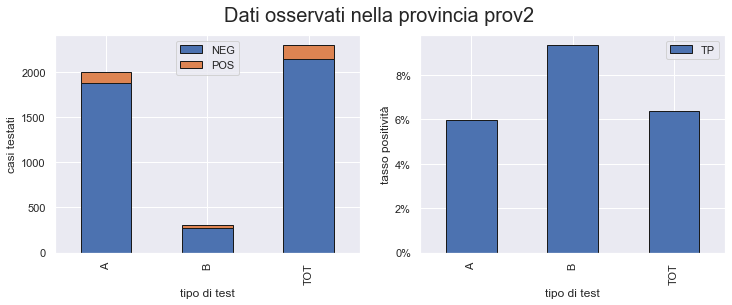

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov2_obs[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
    xlabel='tipo di test'
)

prov2_obs[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
    xlabel='tipo di test'
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Dati osservati nella provincia prov2', fontsize=20)
plt.show()

***

Osserviamo prima cosa accadrebbe se fossimo a conoscenza solamente dei positivi totali e dei casi testati totali per provincia, ignorando quindi la differenza tra i test tipo `A` e tipo `B`.

Verificheremo la seguente ipotesi nulla

> $H_0$: ipotizzando che le due province abbiano il medesimo tasso di positività, i positivi osservati nelle due province **NON** sono significativamente differenti

Pertanto, se otterremo dal test un $p$-value inferiore ad una determinata soglia di probabilità $\alpha$ (10%, 5% o 1%) potremo affermare che sono statisticamente differenti con significatività $\alpha$, altrimenti dovremo accettare l'ipotesi nulla $H_0$ che, alle condizioni specificate, la differenza osservata non è significativa.

In [23]:
prov12a_obs = pd.DataFrame({
    'POS': [prov1_obs.POS.TOT, prov2_obs.POS.TOT],
    'NEG': [prov1_obs.NEG.TOT, prov2_obs.NEG.TOT],
    'TOT': [prov1_obs.TOT.TOT, prov2_obs.TOT.TOT]
}, index=['prov1', 'prov2'])

prov12a_sum = prov12a_obs.sum(axis=0)
prov12a_sum.name = 'TOT'
prov12a_obs = prov12a_obs.append(prov12a_sum)
prov12a_obs['TP'] = prov12a_obs.POS / prov12a_obs.TOT

Raccogliamo i dati complessivi delle due province:

In [24]:
prov12a_obs.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.0f}",
    'NEG': "{:.0f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "dati osservati nelle province"
)

,POS,NEG,TOT,TP
prov1,283,2917,3200,8.84%
prov2,147,2153,2300,6.39%
TOT,430,5070,5500,7.82%


In [25]:
_ = """Latex(prov12a_obs.to_latex(
    formatters={
        'POS': "{:.0f}".format,
        'NEG': "{:.0f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format, 
        'pct': "{:.2%}".format
    },
    caption="positivi complessivi osservati nelle province"
))"""

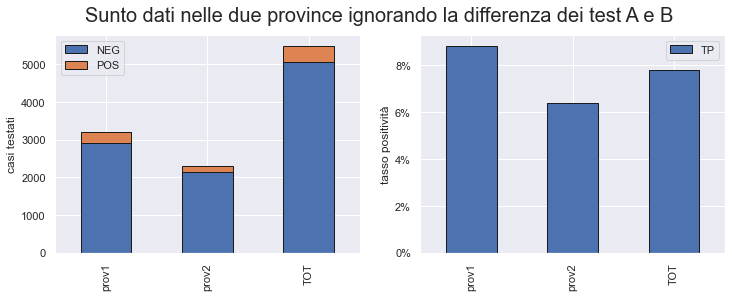

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov12a_obs[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
)

prov12a_obs[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Sunto dati nelle due province ignorando la differenza dei test A e B', fontsize=20)
plt.show()

In [27]:
prov12a_exp = pd.DataFrame({
    'POS': [prov12a_obs.TOT.prov1*prov12a_obs.TP.TOT, prov12a_obs.TOT.prov2*prov12a_obs.TP.TOT],
    'NEG': [np.nan, np.nan],
    'TOT': [prov12a_obs.TOT.prov1, prov12a_obs.TOT.prov2]
}, index=['prov1', 'prov2'])
prov12a_exp['NEG'] = prov12a_exp.TOT - prov12a_exp.POS
prov12a_exp_sum = prov12a_exp.sum(axis=0)
prov12a_exp_sum.name = 'TOT'
prov12a_exp = prov12a_exp.append(prov12a_exp_sum)
prov12a_exp['TP'] = prov12a_exp.POS / prov12a_exp.TOT

In [28]:
Markdown(f"""
e ipotizziamo che il tasso di positività
sia il medesimo, pari al tasso di positività
complessivo {prov12a_obs.TP.TOT:.2%}, 
calcolando i positivi (e negativi) attesi
""")


e ipotizziamo che il tasso di positività
sia il medesimo, pari al tasso di positività
complessivo 7.82%, 
calcolando i positivi (e negativi) attesi


In [29]:
prov12a_exp.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.2f}",
    'NEG': "{:.2f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "dati attesi nelle province sotto ipotesi nulla"
)

,POS,NEG,TOT,TP
prov1,250.18,2949.82,3200,7.82%
prov2,179.82,2120.18,2300,7.82%
TOT,430.00,5070.00,5500,7.82%


In [30]:
_ = """Latex(prov12a_exp.to_latex(
    formatters={
        'POS': "{:.2f}".format,
        'NEG': "{:.2f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format, 
        'pct': "{:.2%}".format
    },
    caption="positivi complessivi attesi nelle province"
))"""

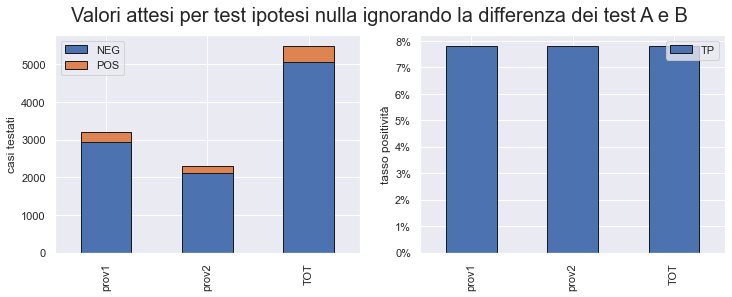

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov12a_exp[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
)

prov12a_exp[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Valori attesi per test ipotesi nulla ignorando la differenza dei test A e B', fontsize=20)
plt.show()

Possiamo ora calcolare il valore del $\chi^2$: indicando con `obs` (observed) i risultati osservati e `exp` (expected) gli attesi, le celle della seguente tabella sono calcolate come

$$
\frac{
    (\mathrm{obs} - \mathrm{exp})^2
}{
    \mathrm{exp}
}
$$

In [32]:
chi_squared_matrix_a = (prov12a_obs.iloc[:2, :2] - prov12a_exp.iloc[:2, :2])**2 / prov12a_exp.iloc[:2, :2]

In [33]:
chi_squared_matrix_a.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.4f}",
    'NEG': "{:.4f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "matrice chi-squared"
)

,POS,NEG
prov1,4.3050,0.3651
prov2,5.9896,0.5080


In [34]:
_ = """Latex(chi_squared_matrix_a.to_latex(
    formatters={
        'POS': "{:.4f}".format,
        'NEG': "{:.4f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.2%}".format
    },
    caption="matrice chi-squared"
))"""

In [35]:
chi_squared_a = chi_squared_matrix_a.values.sum()

In [36]:
p_value_a = sps.chi2.sf(chi_squared_a, df=1)

In [37]:
Markdown(fr"""
La somma dei valori della tabella
è la statistica del chi-quadrato, 
$\chi^2 = {chi_squared_a:.2f}$ che,
per 1 grado di libertà, corrisponde ad
un $p$-value di {p_value_a:.6f}
({p_value_a:.4%})
notevolmente inferiore del più alto livello
di significatività $\alpha$
stabilito in precedenza (1%).

Dovremmo perciò **rigettare** l'ipotesi nulla $H_0$.
""")


La somma dei valori della tabella
è la statistica del chi-quadrato, 
$\chi^2 = 11.17$ che,
per 1 grado di libertà, corrisponde ad
un $p$-value di 0.000832
(0.0832%)
notevolmente inferiore del più alto livello
di significatività $\alpha$
stabilito in precedenza (1%).

Dovremmo perciò **rigettare** l'ipotesi nulla $H_0$.


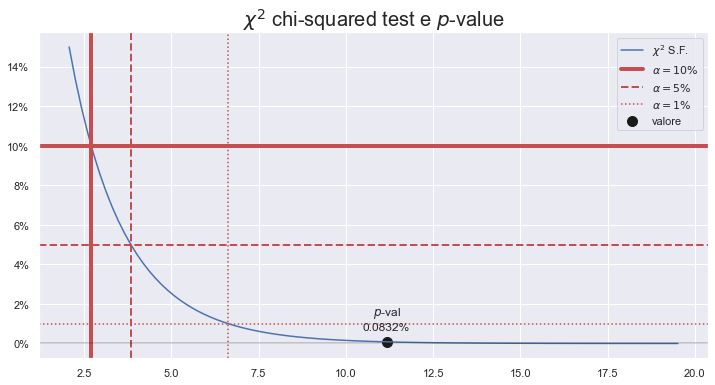

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
chi_dist = sps.chi2(df=1)
chi_dist_x_a = np.linspace(chi_dist.ppf(1-.15), chi_dist.ppf(.99999), 100)
chi_dist_y_a = chi_dist.sf(chi_dist_x_a)
ax.plot(chi_dist_x_a, chi_dist_y_a, label='$\chi^2$ S.F.')
ax.scatter(chi_squared_a, p_value_a, color='k', s=100, label='valore')

ax.axhline(.1, color='r', ls='-', lw=4, label=r'$\alpha=10\%$')
ax.axvline(chi_dist.isf(.1), color='r', lw=4, ls='-')

ax.axhline(.05, color='r', ls='--', lw=2, label=r'$\alpha=5\%$')
ax.axvline(chi_dist.isf(.05), color='r', ls='--', lw=2)

ax.axhline(.01, color='r', ls=':', label=r'$\alpha=1\%$')
ax.axvline(chi_dist.isf(.01), color='r', ls=':')

ax.text(
    chi_squared_a, p_value_a+.005,
    f"$p$-val\n{p_value_a:.4%}",
    ha='center', va='bottom',
)
ax.axhline(0, color='k', alpha=.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.legend()
ax.set_title(
    '$\chi^2$ chi-squared test e $p$-value', fontsize=20
)
plt.show()

In [39]:
Markdown(f"""
Saremmo dunque tentati di affermare che

- ipotizzando che il tasso di positività nelle due province sia il medesimo

la differenza di positivi osservata **è statisticamente significativa** 
($p$-val {p_value_a:.6f}).
""")


Saremmo dunque tentati di affermare che

- ipotizzando che il tasso di positività nelle due province sia il medesimo

la differenza di positivi osservata **è statisticamente significativa** 
($p$-val 0.000832).


***

Sapendo però che sono stati effettuati i test `A` e `B` in differenti percentuali, ci chiediamo se la differenza di positivi e tassi di positività non sia dovuta al caso, ovvero alla differente distribuzione dei test effettuati nelle due province e al differente numero di casi testati a parità di tasso di positività.

A tal fine, verificheremo la seguente ipotesi nulla

> $H_0$: a parità di distribuzione dei test `A` e `B` effettuati e supponendo che i le due province abbiano il medesimo tasso di positività, i positivi osservati nelle due province **NON** sono significativamente differenti

Pertanto, se come sopra otterremo dal test un $p$-value inferiore ad una determinata soglia di probabilità $\alpha$ (10%, 5% o 1%) potremo affermare che sono statisticamente differenti con significatività $\alpha$, altrimenti dovremo accettare l'ipotesi nulla $H_0$ che, alle condizioni specificate, la differenza osservata non è significativa.

In [40]:
prov1_same = prov1_obs.copy(deep=True)

prov1_same.loc['A', 'TOT'] = prov1_same.TOT.TOT / 2

prov1_same.loc['B', 'TOT'] = prov1_same.TOT.TOT / 2

prov1_same.loc['A', 'POS'] = prov1_same.TOT.A * prov1_same.TP.A
prov1_same.loc['B', 'POS'] = prov1_same.TOT.B * prov1_same.TP.B
prov1_same.loc['TOT', 'POS'] = prov1_same.POS.A + prov1_same.POS.B
prov1_same['NEG'] = prov1_same.TOT - prov1_same.POS
prov1_same['TP'] = prov1_same.POS / prov1_same.TOT
prov1_same.loc['A', 'pct'] = prov1_same.TOT.A / prov1_same.TOT.TOT
prov1_same.loc['B', 'pct'] = prov1_same.TOT.B / prov1_same.TOT.TOT
prov1_same.loc['TOT', 'pct'] = 1

Procediamo dunque ridistribuendo i test effettuati nelle due province e supponendo che entrambi abbiano effettuato i test `A` e `B` in ugual percentuale (50%) mantenendo lo stesso tasso di positività osservato.

Per la provincia `prov1` avremo pertanto:

In [41]:
prov1_same.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.2f}",
    'NEG': "{:.2f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.0%}"
}).set_caption(
    "provincia 1: ipotesi di uguale distribuzione dei test"
)

,POS,NEG,TOT,TP,pct
A,88.00,1512.00,1600,5.50%,50%
B,145.07,1454.93,1600,9.07%,50%
TOT,233.07,2966.93,3200,7.28%,100%


In [42]:
_ = """Latex(prov1_same.to_latex(
    formatters={
        'POS': "{:.2f}".format,
        'NEG': "{:.2f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.0%}".format
    },
    caption="dati provincia 1 ipotizzando uguale distribuzione dei test"
))"""

In [43]:
Markdown(f"""
Ovvero, dati i {prov1_same.TOT.TOT:.0f} test totali effettuati,
supponiamo che ne siano stati effettuati {prov1_same.TOT.A:.0f}
di tipo `A` e {prov1_same.TOT.B:.0f} di tipo `B`.

Mantenendo gli stessi tassi di positività, avremmo quindi osservato

- {prov1_same.POS.A:.2f} positivi con test di tipo `A`
- {prov1_same.POS.B:.2f} positivi con test di tipo `B`

e complessivamente {prov1_same.POS.TOT:.2f} sui
{prov1_same.TOT.TOT:.0f} casi testati
(tasso positività {prov1_same.TP.TOT:.2%}).
""")


Ovvero, dati i 3200 test totali effettuati,
supponiamo che ne siano stati effettuati 1600
di tipo `A` e 1600 di tipo `B`.

Mantenendo gli stessi tassi di positività, avremmo quindi osservato

- 88.00 positivi con test di tipo `A`
- 145.07 positivi con test di tipo `B`

e complessivamente 233.07 sui
3200 casi testati
(tasso positività 7.28%).


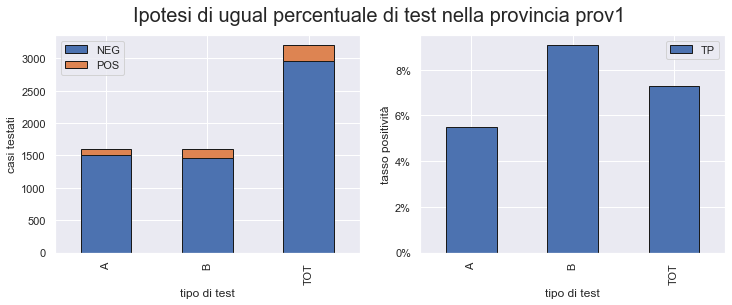

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov1_same[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
    xlabel='tipo di test'
)

prov1_same[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
    xlabel='tipo di test'
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Ipotesi di ugual percentuale di test nella provincia prov1', fontsize=20)
plt.show()

In [45]:
prov2_same = prov2_obs.copy(deep=True)

prov2_same.loc['A', 'TOT'] = prov2_same.TOT.TOT / 2

prov2_same.loc['B', 'TOT'] = prov2_same.TOT.TOT / 2

prov2_same.loc['A', 'POS'] = prov2_same.TOT.A * prov2_same.TP.A
prov2_same.loc['B', 'POS'] = prov2_same.TOT.B * prov2_same.TP.B
prov2_same.loc['TOT', 'POS'] = prov2_same.POS.A + prov2_same.POS.B
prov2_same['NEG'] = prov2_same.TOT - prov2_same.POS
prov2_same['TP'] = prov2_same.POS / prov2_same.TOT
prov2_same.loc['A', 'pct'] = prov2_same.TOT.A / prov2_same.TOT.TOT
prov2_same.loc['B', 'pct'] = prov2_same.TOT.B / prov2_same.TOT.TOT
prov2_same.loc['TOT', 'pct'] = 1

Allo stesso modo, per la provincia `prov2`:

In [46]:
prov2_same.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.2f}",
    'NEG': "{:.2f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.0%}"
}).set_caption(
    "provincia 2: ipotesi di uguale distribuzione dei test"
)

,POS,NEG,TOT,TP,pct
A,68.42,1081.58,1150,5.95%,50%
B,107.33,1042.67,1150,9.33%,50%
TOT,175.76,2124.24,2300,7.64%,100%


In [47]:
_ = """Latex(prov2_same.to_latex(
    formatters={
        'POS': "{:.2f}".format,
        'NEG': "{:.2f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.0%}".format
    },
    caption="dati provincia 2 ipotizzando uguale distribuzione dei test"
))"""

In [48]:
Markdown(f"""
dati i {prov2_same.TOT.TOT:.0f} test totali effettuati,
supponiamo che ne siano stati effettuati {prov2_same.TOT.A:.0f}
di tipo `A` e {prov2_same.TOT.B:.0f} di tipo `B`.

Mantenendo gli stessi tassi di positività, avremmo quindi osservato

- {prov2_same.POS.A:.2f} positivi con test di tipo `A`
- {prov2_same.POS.B:.2f} positivi con test di tipo `B`

e complessivamente {prov2_same.POS.TOT:.2f} sui
{prov2_same.TOT.TOT:.0f} casi testati
(tasso positività {prov2_same.TP.TOT:.2%}).
""")


dati i 2300 test totali effettuati,
supponiamo che ne siano stati effettuati 1150
di tipo `A` e 1150 di tipo `B`.

Mantenendo gli stessi tassi di positività, avremmo quindi osservato

- 68.42 positivi con test di tipo `A`
- 107.33 positivi con test di tipo `B`

e complessivamente 175.76 sui
2300 casi testati
(tasso positività 7.64%).


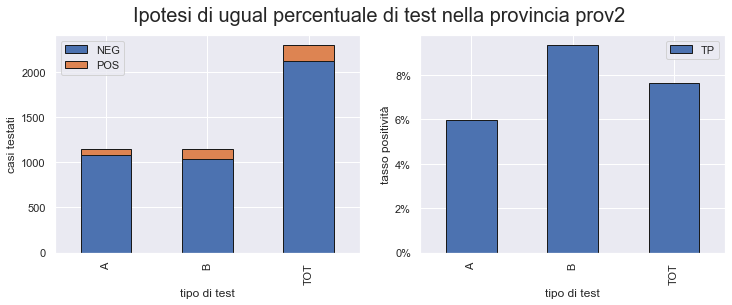

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov2_same[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
    xlabel='tipo di test'
)

prov2_same[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
    xlabel='tipo di test'
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Ipotesi di ugual percentuale di test nella provincia prov2', fontsize=20)
plt.show()

***

Possiamo ora chiederci se i positivi complessivi osservati nelle due province a parità di test effettuati siano significativamente differenti sotto l'ipotesi nulla che le due province abbiano il medesimo tasso di positività.

A tal fine effettueremo un test del chi quadrato $\chi^2$ (chi-squared).

In [50]:
prov12_obs = pd.DataFrame({
    'POS': [prov1_same.POS.TOT, prov2_same.POS.TOT],
    'NEG': [prov1_same.NEG.TOT, prov2_same.NEG.TOT],
    'TOT': [prov1_same.TOT.TOT, prov2_same.TOT.TOT]
}, index=['prov1', 'prov2'])

prov12_sum = prov12_obs.sum(axis=0)
prov12_sum.name = 'TOT'
prov12_obs = prov12_obs.append(prov12_sum)
prov12_obs['TP'] = prov12_obs.POS / prov12_obs.TOT

Raccogliamo i dati complessivi delle due province:

In [51]:
prov12_obs.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.2f}",
    'NEG': "{:.2f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "dati osservati nelle province sotto ipotesi di uguale distribuzione dei test"
)

,POS,NEG,TOT,TP
prov1,233.07,2966.93,3200,7.28%
prov2,175.76,2124.24,2300,7.64%
TOT,408.82,5091.18,5500,7.43%


In [52]:
_ = """Latex(prov12_obs.to_latex(
    formatters={
        'POS': "{:.2f}".format,
        'NEG': "{:.2f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.2%}".format
    },
    caption="dati province ipotizzando uguale distribuzione dei test"
))"""

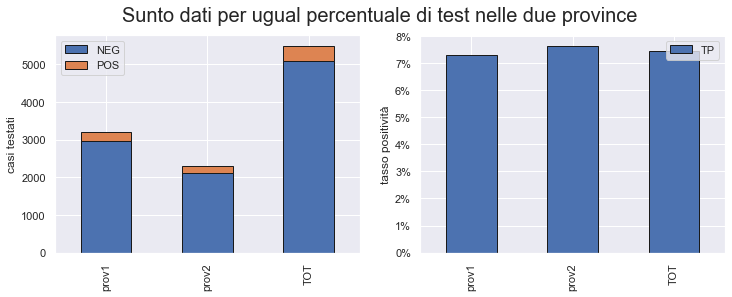

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov12_obs[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
)

prov12_obs[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Sunto dati per ugual percentuale di test nelle due province', fontsize=20)
plt.show()

In [54]:
prov12_exp = pd.DataFrame({
    'POS': [prov12_obs.TOT.prov1*prov12_obs.TP.TOT, prov12_obs.TOT.prov2*prov12_obs.TP.TOT],
    'NEG': [np.nan, np.nan],
    'TOT': [prov12_obs.TOT.prov1, prov12_obs.TOT.prov2]
}, index=['prov1', 'prov2'])
prov12_exp['NEG'] = prov12_exp.TOT - prov12_exp.POS
prov12_exp_sum = prov12_exp.sum(axis=0)
prov12_exp_sum.name = 'TOT'
prov12_exp = prov12_exp.append(prov12_exp_sum)
prov12_exp['TP'] = prov12_exp.POS / prov12_exp.TOT

In [55]:
Markdown(f"""
e ipotizziamo che il tasso di positività
sia il medesimo, pari al tasso di positività
complessivo {prov12_obs.TP.TOT:.2%}, 
calcolando i positivi (e negativi) attesi
""")


e ipotizziamo che il tasso di positività
sia il medesimo, pari al tasso di positività
complessivo 7.43%, 
calcolando i positivi (e negativi) attesi


In [56]:
prov12_exp.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.2f}",
    'NEG': "{:.2f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "dati attesi nelle province sotto ipotesi di uguale distribuzione dei test"
    " e uguale tasso di positività"
)

,POS,NEG,TOT,TP
prov1,237.86,2962.14,3200,7.43%
prov2,170.96,2129.04,2300,7.43%
TOT,408.82,5091.17,5500,7.43%


In [57]:
_ = """Latex(prov12_exp.to_latex(
    formatters={
        'POS': "{:.2f}".format,
        'NEG': "{:.2f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.2%}".format
    },
    caption="attesi province ipotizzando uguale distribuzione dei test"
))"""

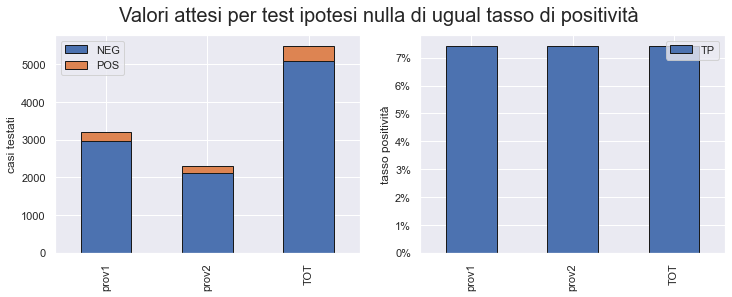

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

prov12_exp[['NEG', 'POS']].plot(kind='bar', stacked=True, ec='k', ax=ax[0])
ax[0].set(
    ylabel='casi testati',
)

prov12_exp[['TP']].plot(kind='bar', ec='k', ax=ax[1])
ax[1].set(
    ylabel='tasso positività',
)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
fig.suptitle('Valori attesi per test ipotesi nulla di ugual tasso di positività', fontsize=20)
plt.show()

Possiamo ora calcolare il valore del $\chi^2$: come sopra, indicando con `obs` (observed) i risultati osservati e `exp` (expected) gli attesi, le celle della seguente tabella sono calcolate come

$$
\frac{
    (\mathrm{obs} - \mathrm{exp})^2
}{
    \mathrm{exp}
}
$$

In [59]:
chi_squared_matrix = (prov12_obs.iloc[:2, :2] - prov12_exp.iloc[:2, :2])**2 / prov12_exp.iloc[:2, :2]

In [60]:
chi_squared_matrix.style.apply(highlight_cols, axis=None).format({
    'POS': "{:.4f}",
    'NEG': "{:.4f}",
    'TOT': "{:.0f}",
    'TP': "{:.2%}", 'pct': "{:.2%}"
}).set_caption(
    "matrice chi-squared"
)

,POS,NEG
prov1,0.0967,0.0078
prov2,0.1345,0.0108


In [61]:
_ = """Latex(chi_squared_matrix.to_latex(
    formatters={
        'POS': "{:.4f}".format,
        'NEG': "{:.4f}".format,
        'TOT': "{:.0f}".format,
        'TP': "{:.2%}".format,
        'pct': "{:.2%}".format
    },
    caption="matrice chi-squared"
))"""

In [62]:
chi_squared = chi_squared_matrix.values.sum()

In [63]:
p_value = sps.chi2.sf(chi_squared, df=1)

In [64]:
Markdown(fr"""
La somma dei valori della tabella
è la statistica del chi-quadrato, 
$\chi^2 = {chi_squared:.2f}$ che,
per 1 grado di libertà, corrisponde ad
un $p$-value di {p_value:.4f}
({p_value:.2%})
notevolmente maggiore dei livelli
di significatività $\alpha$
stabiliti in precedenza.

Dovremo perciò **accettare** l'ipotesi nulla $H_0$.
""")


La somma dei valori della tabella
è la statistica del chi-quadrato, 
$\chi^2 = 0.25$ che,
per 1 grado di libertà, corrisponde ad
un $p$-value di 0.6173
(61.73%)
notevolmente maggiore dei livelli
di significatività $\alpha$
stabiliti in precedenza.

Dovremo perciò **accettare** l'ipotesi nulla $H_0$.


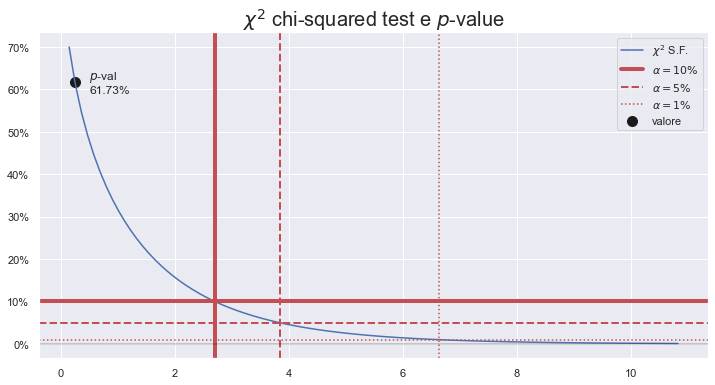

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
chi_dist = sps.chi2(df=1)
chi_dist_x = np.linspace(chi_dist.ppf(1-.7), chi_dist.ppf(.999), 100)
chi_dist_y = chi_dist.sf(chi_dist_x)
ax.plot(chi_dist_x, chi_dist_y, label='$\chi^2$ S.F.')
ax.scatter(chi_squared, p_value, color='k', s=100, label='valore')

ax.axhline(.1, color='r', ls='-', lw=4, label=r'$\alpha=10\%$')
ax.axvline(chi_dist.isf(.1), color='r', lw=4, ls='-')

ax.axhline(.05, color='r', ls='--', lw=2, label=r'$\alpha=5\%$')
ax.axvline(chi_dist.isf(.05), color='r', ls='--', lw=2)

ax.axhline(.01, color='r', ls=':', label=r'$\alpha=1\%$')
ax.axvline(chi_dist.isf(.01), color='r', ls=':')

ax.text(
    chi_squared+.25, p_value,
    f"$p$-val\n{p_value:.2%}",
    ha='left', va='center',
)
ax.axhline(0, color='k', alpha=.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.legend()
ax.set_title(
    '$\chi^2$ chi-squared test e $p$-value', fontsize=20
)
plt.show()

In [66]:
Markdown(f"""
Possiamo dunque infine affermare che

- supponendo che le due province abbiano effettuato la stessa percentuale di test `A` e `B`
- sotto ipotesi nulla che il tasso di positività nelle due province sia il medesimo

la differenza di positivi osservata **NON è statisticamente significativa** 
($p$-val {p_value:.4f}).
""")


Possiamo dunque infine affermare che

- supponendo che le due province abbiano effettuato la stessa percentuale di test `A` e `B`
- sotto ipotesi nulla che il tasso di positività nelle due province sia il medesimo

la differenza di positivi osservata **NON è statisticamente significativa** 
($p$-val 0.6173).


***

Abbiamo così dimostrato come l'utilizzo di differenti test in differenti percentuali su due campioni di popolazione sia di notevole importanza al fine di confrontare i due campioni e determinare se le differenze osservate siano statisticamente significative o solo dovute al caso.

In [67]:
Markdown(fr"""
Nell'esempio infatti, le due province avevano incidenze molto simili 
({I_1:.1%} per la `prov1` e {I_2:.1%} per la `prov2`) ma 
l'utilizzo in differenti proporzioni di tests con differenti sensibilità e specificità,
se ignorato, può indurre a considerare statisticamente significativa
la differenza nei tassi di positività complessivi ($p$-val {p_value_a:.5f}).

Se invece la differente distribuzione dei test viene considerata, 
risulta evidente che i positivi osservati non sono significativamente
differenti ($p$-val {p_value:.2f}).
""")


Nell'esempio infatti, le due province avevano incidenze molto simili 
(5.1% per la `prov1` e 5.3% per la `prov2`) ma 
l'utilizzo in differenti proporzioni di tests con differenti sensibilità e specificità,
se ignorato, può indurre a considerare statisticamente significativa
la differenza nei tassi di positività complessivi ($p$-val 0.00083).

Se invece la differente distribuzione dei test viene considerata, 
risulta evidente che i positivi osservati non sono significativamente
differenti ($p$-val 0.62).
